In [119]:
import numpy as np
from math import e
from PIL import Image
import glob
import cv2
from matplotlib import pyplot as plt
import matplotlib
from math import exp
from math import sqrt

In [358]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(l,image):
    D0 = 2**(l-1)
    base = np.ones(image.shape[0:2])
    rows, cols = image.shape[0:2]
    u,v = rows/2, cols/2
    for y in range(cols):
        for x in range(rows):
            base[x,y] = 1-exp(((-distance((x,y),(u,v))**2)/(2*(D0**2))))
    
    new_image = norm_img(inv_dft(base*dft(image)))
    
    return new_image

def gaussianLP(l,image):
    D0 = 2**(l-1)
    base = np.zeros(image.shape[0:2])
    rows, cols = image.shape[0:2]
    u,v = rows/2, cols/2
    for y in range(cols):
        for x in range(rows):
            base[x,y] = exp(((-distance((x,y),(u,v))**2)/(2*(D0**2))))
    inv = inv_dft(base*dft(image))
    new_image = np.clip(inv,0,255)
    new_image = norm_img(inv)
    
    
    return new_image

def laplacian(l,image):
    a, b = gaussianHP(l,image), gaussianHP(l+1,image)
    return a-b

In [336]:
def dft(image):
    dft = np.array(np.fft.fftshift(np.fft.fft2(image)))
    return dft

In [337]:
def show_dft(dft,image_name):
    #plt.rcParams['figure.figsize'] = [10,3]
    #plt.subplot(1,3,i+1)
    plt.imshow(np.log(np.abs(dft)),'gray')
    plt.suptitle('dft of image #{}'.format(image_name))
    plt.axis('off')
    plt.show()

In [338]:
def inv_fil_dfts(dfts):
    inv_dfts = []
    for i in range(len(dfts)):
        inv_dfts.append(np.real(np.fft.ifft2(np.fft.ifftshift(dfts[i]))))
    return np.array(inv_dfts)

In [339]:
def inv_dft(dft):
    return(np.real(np.fft.ifft2(np.fft.ifftshift(dft))))

In [340]:
def show_images(inv_dfts):
    plt.rcParams['figure.figsize'] = [10,10]
    for i in range(len(inv_dfts)):
        plt.subplot(1,4,i+1)
        plt.imshow(inv_dfts[i],'gray')
#         plt.suptitle('dfts of image #{}'.for)
        plt.axis('off')
    plt.show()

In [341]:
def norm_img(image):
    return((image - np.min(image))/(np.max(image)-np.min(image)))*255

# Part A(cars)

In [359]:
images = np.array([cv2.imread(file) for file in glob.glob("C:/Users/sherw/OneDrive/Desktop/DIP_HW3/inputs/p7/I/*.png")])
images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]
img1 = images[0]
img2 = images[2]
mask = images[1]

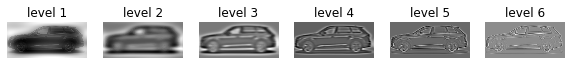

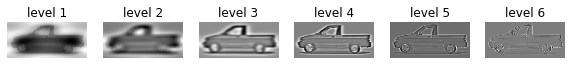

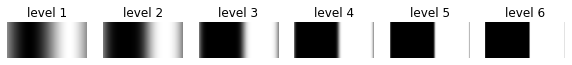

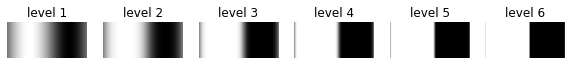

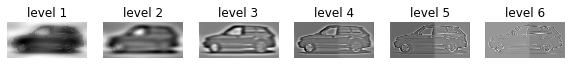

In [363]:
# %matplotlib qt
n = 6
l1, l2, gm, combined = [], [], [], []

for i in range(n):
    l1.append(laplacian(i+1,img1))
    l2.append(laplacian(i+1,img2))
    gm.append(gaussianLP(i+1,mask)/255)
    combined.append(l1[i]*gm[i]+(1-gm[i])*l2[i])
    
    plt.figure(1)
    plt.rcParams['figure.figsize'] = [10,3]
    plt.subplot(1,n,i+1)
    plt.imshow(l1[i],'gray')
    plt.title('level {}'.format(i+1))
    plt.axis('off')
    
    plt.figure(2)
    plt.rcParams['figure.figsize'] = [10,3]
    plt.subplot(1,n,i+1)
    plt.imshow(l2[i],'gray')
    plt.title('level {}'.format(i+1))
    plt.axis('off')
    
    plt.figure(3)
    plt.rcParams['figure.figsize'] = [10,3]
    plt.subplot(1,n,i+1)
    plt.imshow(gm[i],'gray')
    plt.title('level {}'.format(i+1))
    plt.axis('off')
    
    plt.figure(4)
    plt.rcParams['figure.figsize'] = [10,3]
    plt.subplot(1,n,i+1)
    plt.imshow(1-gm[i],'gray')
    plt.title('level {}'.format(i+1))
    plt.axis('off')

    plt.figure(5)
    plt.rcParams['figure.figsize'] = [10,3]
    plt.subplot(1,n,i+1)
    plt.imshow(combined[i],'gray')
    plt.title('level {}'.format(i+1))
    plt.axis('off')
    
plt.show()


In [364]:
result = np.zeros(combined[0].shape)
for i in range(len(combined)):
    result += combined[i]

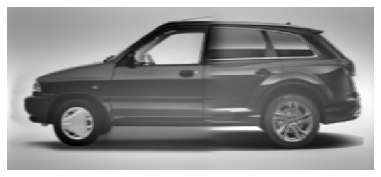

In [365]:
# %matplotlib qt
plt.imshow(result,'gray')
plt.axis('off')
plt.show()

# Part B(Messi & Donald)

In [366]:
images = np.array([cv2.imread(file) for file in glob.glob("C:/Users/sherw/OneDrive/Desktop/DIP_HW3/inputs/p7/II/*.png")])
#images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]
img1 = images[0]
img2 = images[2]
mask = images[1]
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

In [367]:
def img_chnnls(rgb):
    channels = []
    ch_count = len(rgb[0][0])
    for i in range(ch_count):
        channels.append(rgb[:,:,i])
    return channels
def dft_chnnls(channelss):
    dfts = []
    for ch in channelss:
        dfts.append(np.fft.fftshift(np.fft.fft2(ch)))
    return dfts

In [368]:
def mix(image1,image2,mask,n):
    ch1 = img_chnnls(image1)
    ch2 = img_chnnls(image2)
    result = []
    for j in range(img1.shape[2]):
        l1, l2, gm, combined = [], [], [], []

        for i in range(n):
            l1.append(laplacian(i+1,ch1[j]))
            l2.append(laplacian(i+1,ch2[j]))
            gm.append(gaussianLP(i+1,mask)/255)
            combined.append(l2[i]*gm[i]+(1-gm[i])*l1[i])
            
            plt.figure(1)
            plt.rcParams['figure.figsize'] = [10,3]
            plt.subplot(1,n,i+1)
            plt.imshow(l1[i],'gray')
            plt.title('level {}'.format(i+1))
            if j == 0:
                plt.suptitle('Blue Channel')
            elif j == 1:
                plt.suptitle('Green Channel')
            elif j == 2:
                plt.suptitle('Red Channel')
            plt.axis('off')

            plt.figure(2)
            plt.rcParams['figure.figsize'] = [10,3]
            plt.subplot(1,n,i+1)
            plt.imshow(l2[i],'gray')
#             plt.title('level {}'.format(i+1))
            plt.axis('off')

            plt.figure(3)
            plt.rcParams['figure.figsize'] = [10,3]
            plt.subplot(1,n,i+1)
            plt.imshow(gm[i],'gray')
#             plt.title('level {}'.format(i+1))
            plt.axis('off')

            plt.figure(4)
            plt.rcParams['figure.figsize'] = [10,3]
            plt.subplot(1,n,i+1)
            plt.imshow(1-gm[i],'gray')
#             plt.title('level {}'.format(i+1))
            plt.axis('off')

            plt.figure(5)
            plt.rcParams['figure.figsize'] = [10,3]
            plt.subplot(1,n,i+1)
            plt.imshow(combined[i],'gray')
#             plt.title('level {}'.format(i+1))
            plt.axis('off')
        plt.show()
        result_ch = np.zeros(combined[0].shape)
        for k in range(len(combined)):
            result_ch += combined[k]
        result.append(result_ch)
    return np.array(result)

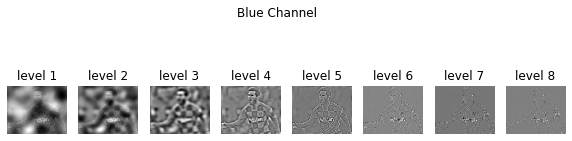

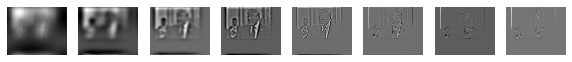

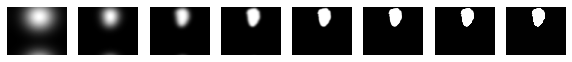

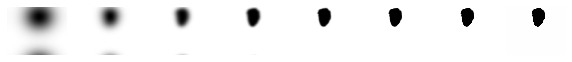

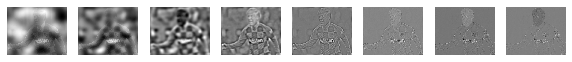

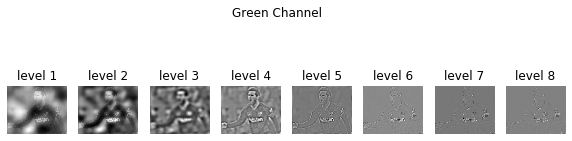

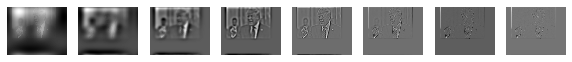

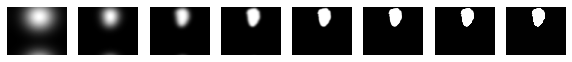

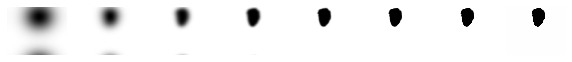

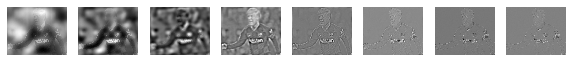

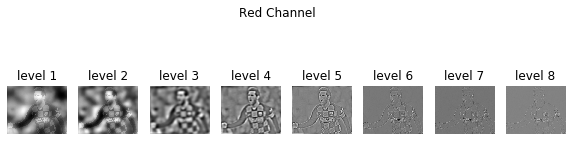

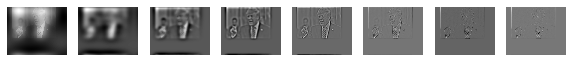

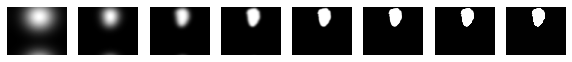

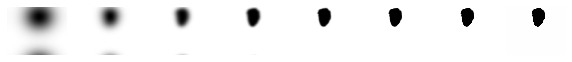

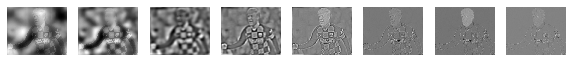

In [369]:
result = mix(img1,img2,mask,8)

In [371]:
for i in range(len(result)):
    result[i] = norm_img(result[i])

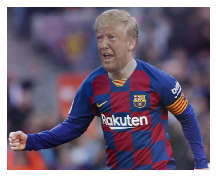

In [372]:
stack = np.dstack(result)
astype = stack.astype(np.uint8)
last = cv2.cvtColor(astype, cv2.COLOR_BGR2RGB)
plt.imshow(last)
plt.axis('off')
plt.show()

# Part C(T-shirt)

In [373]:
images = np.array([cv2.imread(file) for file in glob.glob("C:/Users/sherw/OneDrive/Desktop/DIP_HW3/inputs/p7/III/*.png")])
#images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]
img1 = images[0]
img2 = images[1]

In [374]:
bg = Image.fromarray(np.zeros(img1.shape).astype(np.uint8))

In [375]:
a = Image.fromarray(img1)

In [376]:
a.size

(600, 800)

In [377]:
def cen_in_mask(image,mask_shape):
    bg = Image.fromarray(np.zeros(mask_shape).astype(np.uint8))
    image = Image.fromarray(image)
    img_row, img_col = image.size
    bg_row, bg_col = bg.size
    bg.paste(image,((bg_row-img_row)//2,(bg_col-img_col)//2))
    return np.array(bg)

In [378]:
img1 = cen_in_mask(img1,img2.shape)

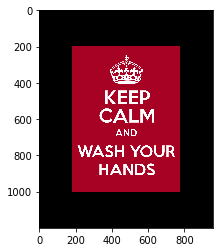

In [437]:
# %matplotlib qt
img1_copy = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1_copy)
plt.show()

In [405]:
# mask = np.zeros(img1.shape[:2])
# row,col = img1.shape[:2]
# for i in range(row):
#     for j in range(col):
#         if i > 240 and i< 912 and j > 328 and j < 645:
#             mask[i,j] = 255
#         elif i > 740 and i< 812 and j > 328 and j < 645:
#             mask[i,j] = 255

In [414]:
# mask = np.zeros(img1.shape[:2])
# row,col = img1.shape[:2]
# for i in range(row):
#     for j in range(col):
#         if i > 240 and i< 912 and j > 328 and j < 645:
#             mask[i,j] = 255
#         elif i > 740 and i< 812 and j > 210 and j < 755:
#             mask[i,j] = 255

In [431]:
# mask = np.zeros(img1.shape[:2])
# row,col = img1.shape[:2]
# for i in range(row):
#     for j in range(col):
#         if i > 240 and i< 412 and j > 384 and j < 580:
#             mask[i,j] = 255
#         elif i > 740 and i< 812 and j > 210 and j < 755:
#             mask[i,j] = 255
#         elif i > 437 and i< 522 and j > 357 and j < 624:
#             mask[i,j] = 255
#         elif i > 647 and i< 698 and j > 417 and j < 542:
#             mask[i,j] = 255
#         elif i > 536 and i< 622 and j > 330 and j < 642:
#             mask[i,j] = 255
#         elif i > 840 and i< 913 and j > 326 and j < 646:
#             mask[i,j] = 255

In [435]:
mask = np.zeros(img1.shape[:2])
row,col = img1.shape[:2]
for i in range(row):
    for j in range(col):
        if img1[i,j,0] == 255:
            mask[i,j] = 1

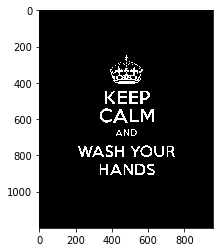

In [436]:
# %matplotlib inline
plt.imshow(mask,'gray')
plt.show()

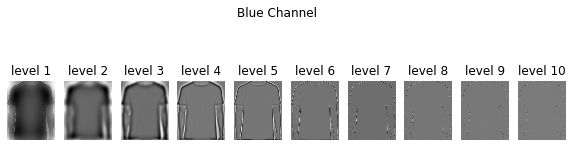

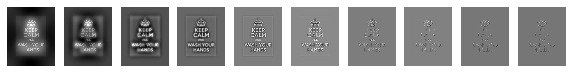

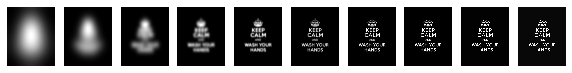

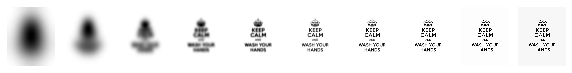

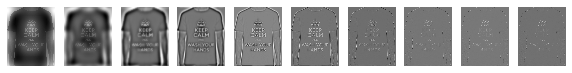

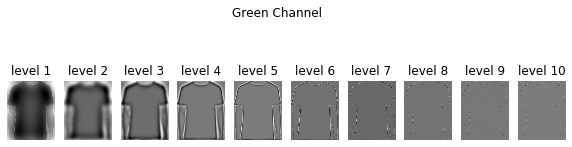

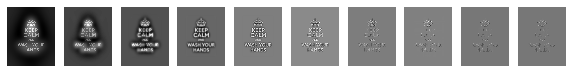

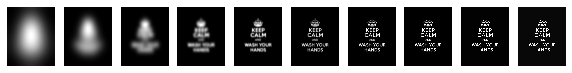

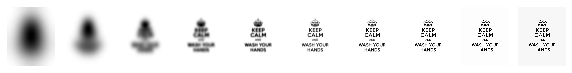

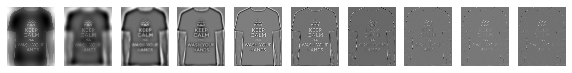

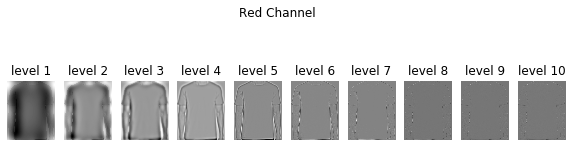

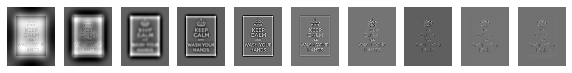

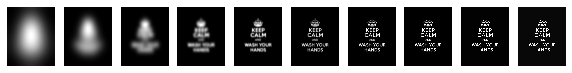

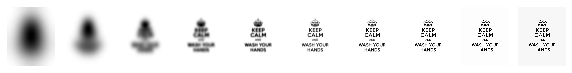

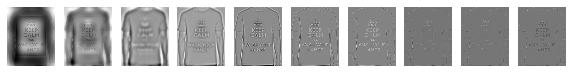

In [422]:
result = mix(img2,img1,mask,10)

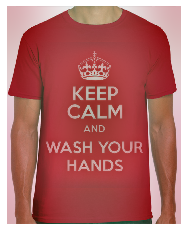

In [430]:
# %matplotlib inline
for i in range(len(result)):
    result[i] = norm_img(result[i])
stack = np.dstack(result)
astype = stack.astype(np.uint8)
last = cv2.cvtColor(astype, cv2.COLOR_BGR2RGB)
plt.imshow(last)
plt.axis('off')
plt.show()